# Explore here

In [3]:
from dotenv import load_dotenv
load_dotenv()
import os

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [4]:
import spotipy
spotipy.Spotify()
from spotipy.oauth2 import SpotifyClientCredentials

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

In [8]:
Eminem = 'spotify:artist:7dGJo4pcD2V6oG8kP0tJRR'

results = spotify.artist_top_tracks(Eminem)

#GENERATES ERROR - NO CLEAR INSTRUCTIONS TO PROCEED!

In [9]:
for track in results['tracks'][:10]:
    print('track    : ' + track['name'])
    if track['preview_url'] is not None:
        print(track['preview_url'])

    print('cover art: ' + track['album']['images'][0]['url'])

track    : Without Me
cover art: https://i.scdn.co/image/ab67616d0000b2736ca5c90113b30c3c43ffb8f4
track    : Mockingbird
cover art: https://i.scdn.co/image/ab67616d0000b273726d48d93d02e1271774f023
track    : The Real Slim Shady
cover art: https://i.scdn.co/image/ab67616d0000b273dbb3dd82da45b7d7f31b1b42
track    : Lose Yourself
cover art: https://i.scdn.co/image/ab67616d0000b273eab40fc794b88b9d1e012578
track    : Love The Way You Lie
cover art: https://i.scdn.co/image/ab67616d0000b273c08d5fa5c0f1a834acef5100
track    : Godzilla (feat. Juice WRLD)
cover art: https://i.scdn.co/image/ab67616d0000b2732f44aec83b20e40f3baef73c
track    : Till I Collapse
cover art: https://i.scdn.co/image/ab67616d0000b2736ca5c90113b30c3c43ffb8f4
track    : Superman
cover art: https://i.scdn.co/image/ab67616d0000b2736ca5c90113b30c3c43ffb8f4
track    : Stan
cover art: https://i.scdn.co/image/ab67616d0000b273dbb3dd82da45b7d7f31b1b42
track    : The Monster
cover art: https://i.scdn.co/image/ab67616d0000b2733c65085

In [10]:
if results:
  # We keep the "tracks" object of the answer
  tracks = results["tracks"]
  # We select, for each song, the data we are interested in and discard the rest
  tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]


In [11]:
import pandas as pd
tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

print(tracks_df.head(10))

   duration_ms                         name  popularity
3     5.441100                Lose Yourself          79
9     4.169800                  The Monster          80
8     6.735100                         Stan          82
7     5.838667                     Superman          83
5     3.513333  Godzilla (feat. Juice WRLD)          85
6     4.963100              Till I Collapse          85
4     4.389550         Love The Way You Lie          86
1     4.179333                  Mockingbird          87
2     4.736667          The Real Slim Shady          87
0     4.838667                   Without Me          88


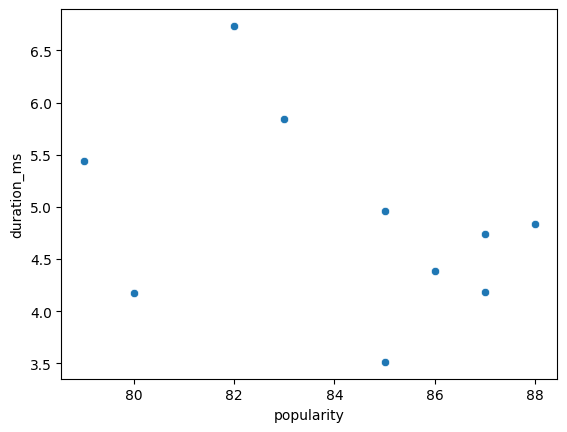

In [13]:
import seaborn as sns

Tracks_Graph = sns.scatterplot (data = tracks_df, x = "popularity", y = "duration_ms")
fig = Tracks_Graph.get_figure()